## Imports

In [13]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import statistics
from numpy import random
from random import randint
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge, Lasso

## Methods

In [14]:
def load():
    data = pd.read_csv("../HPP/train_preprocessed.csv")
    return data

## Model

In [15]:
data = load()
columns = data.columns.tolist()
X = data.drop('SalePrice', axis = 1)
y = data[["SalePrice"]]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
#test_size=0.2 means %20 test datas, %80 train datas
method_names = []
method_scores = []

In [17]:
#LINEAR REGRESSION
lm = LinearRegression()
model = lm.fit(x_train, y_train)
print("Score for Linear Regression: {}".format(model.score(x_test,y_test)))
method_names.append("LinearRegression")
method_scores.append(model.score(x_test,y_test))
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
cross_val_score(model, x_train, y_train, cv = 10, scoring = "neg_mean_squared_error")
#cv rmse
np.sqrt(np.mean(-cross_val_score(model, x_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

Score for Linear Regression: -0.06542283227868562


239102549.67581016

In [18]:
#Lasso REGRESSION
lassoModel = Lasso()
lassoModel.fit(x_train, y_train)
print("Score for Lasso Regression: {}".format(lassoModel.score(x_test,y_test)))
method_names.append("Lasso")
method_scores.append(lassoModel.score(x_test,y_test))

Score for Lasso Regression: 0.8745344475762047


c:\Users\BORA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.145e+11, tolerance: 6.901e+08
  model = cd_fast.enet_coordinate_descent(


In [19]:
#RIDGE REGRESSION
ridgeModel = Ridge()
ridgeModel = Ridge(alpha = 5).fit(x_train, y_train)
print("Score for Ridge Regression: {}".format(ridgeModel.score(x_test,y_test)))
method_names.append("Ridge")
method_scores.append(ridgeModel.score(x_test,y_test))

Score for Ridge Regression: 0.019692670650263033


In [20]:
#KNN
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 3: {}".format(knn.score(x_test,y_test)))
method_names.append("KNN")
method_scores.append(knn.score(x_test,y_test))

Score for Number of Neighbors = 3: 0.724677244045776


In [21]:
#SVR
svr_model = SVR(kernel='linear').fit(x_train, y_train)
print("Score for SVR: {}".format(svr_model.score(x_test,y_test)))
method_names.append("SVR")
method_scores.append(svr_model.score(x_test,y_test))

c:\Users\BORA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score for SVR: 0.7824954839418345


Text(0, 0.5, 'Method Score')

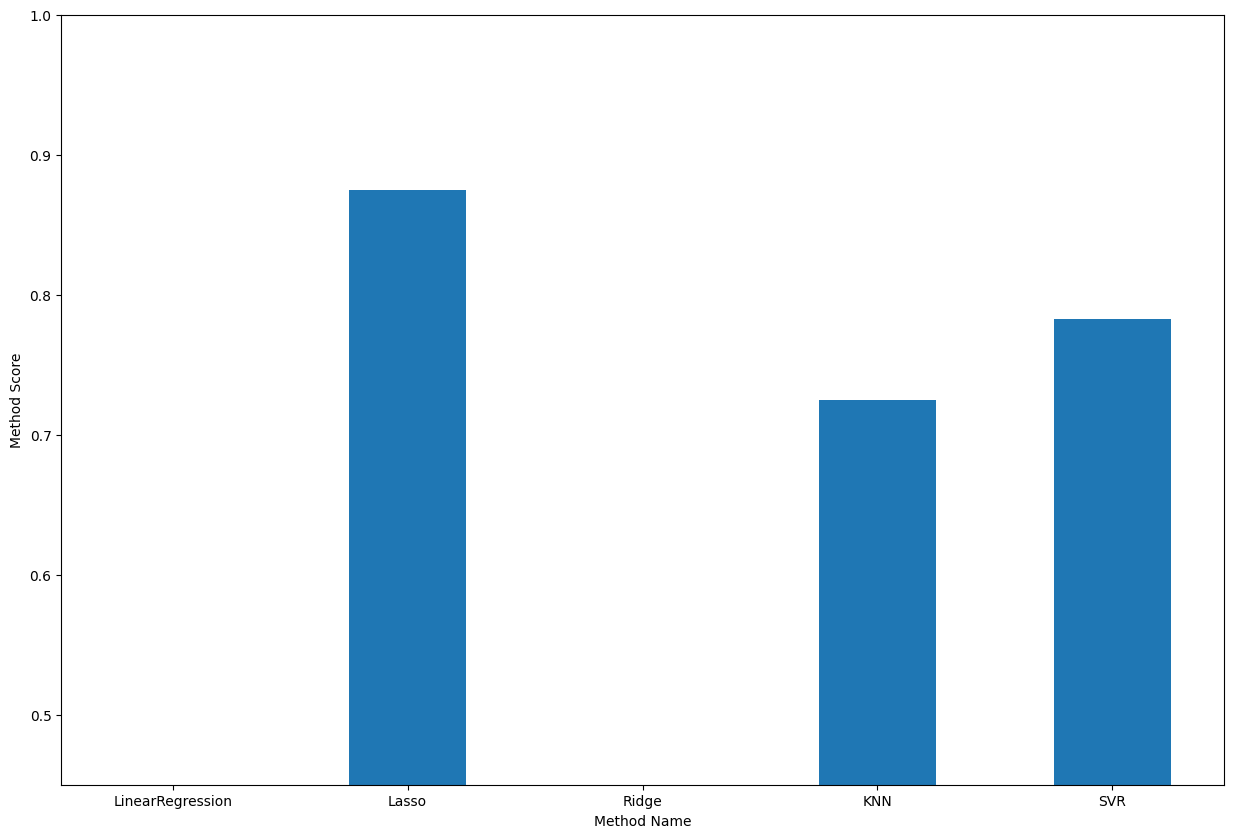

In [22]:
plt.figure(figsize=(15,10))
plt.ylim([0.45,1])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')